# EAS 4610 - Earth Systems Modeling - Final Project
## Atmospheric/Shallow Water Gravity Waves
### By: Carson Clements, Kate Breeden
### Due: Tuesday, December 6th
### Requirements/Rubric: https://gatech.instructure.com/courses/261984/assignments/1234642
### Original Paper (Internal Gravity Waves in the Atmosphere): https://reader.elsevier.com/reader/sd/pii/S007461420480041X?token=0857787B8B9E9271C8A60B92489BEFF2C13E45CB9E82B096A270BAF36C9140939E1555793F0E0CF14F4AF85AECACF9A9&originRegion=us-east-1&originCreation=20221129172936

List of Requirements
## Introduction

## Equations

## Numerical Methods

## Results

## Figures

### Necessary Imports

In [709]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma
from scipy.sparse import spdiags
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

# Enable interactive plot
%matplotlib notebook

### Defining a Plotmaking Function

In [710]:
def plotmaking(x_min,x_max,y_min,y_max,title,xlabel,ylabel,x_input,y_input,tmax,anim):
    fig, ax = plt.subplots()

    
    ax.set_xlim((x_min, x_max))
    ax.set_ylim((y_min, y_max))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return (line,)

    def animate(i):
        x = x_input
        y = y_input
        line.set_data(x, y)
        return (line,)

    anim = FuncAnimation(fig, animate, init_func=init, frames=t_Total, interval=10, blit=True)
    plt.show()

## WaveEqnDemo Base
### Created by: Dr. Robel
### Minor Edits by: Carson Clements, Kate Breeden

### Parameters to Consider

In [711]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

### Assembling the Grid

<IPython.core.display.Javascript object>


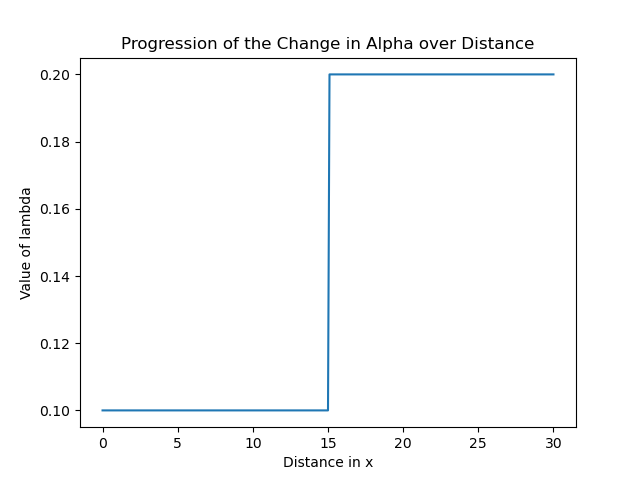

Text(0, 0.5, 'Value of lambda')

In [712]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.figure(1)
plt.title("Progression of the Change in Alpha over Distance")
plt.plot(x,lam)
plt.xlabel('Distance in x')
plt.ylabel('Value of lambda')

### Pre-Allocating Variables and Initial Conditions

In [713]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

### Making the Tridiagonal Matrix

In [714]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()
M

array([[1.979996, 0.010002, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.010002, 1.979996, 0.010002, ..., 0.      , 0.      , 0.      ],
       [0.      , 0.010002, 1.979996, ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 1.919984, 0.040008, 0.      ],
       [0.      , 0.      , 0.      , ..., 0.040008, 1.919984, 0.040008],
       [0.      , 0.      , 0.      , ..., 0.      , 0.040008, 1.919984]])

### Establishing Boundary Conditions

In [715]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

### Solving the Equation

In [716]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]
print(u)

#Function for Animated Plots
#def animate(frame_num):
#    for k in np.arange(nt):
#        y[k] = u[:,k]
#    line.set_data((x, y))
#    return line

[[ 1.00000000e+000  1.00000000e+000  9.99950115e-001 ... -3.35336164e-005
  -1.98139938e-005 -7.05254274e-006]
 [ 9.95012479e-001  9.95012479e-001  9.94914197e-001 ... -1.16168329e-004
  -1.15611984e-004 -1.12409398e-004]
 [ 9.80198673e-001  9.80198673e-001  9.80104781e-001 ...  5.53708120e-005
   5.31611589e-005  5.06190703e-005]
 ...
 [ 1.46071048e-193  1.46071048e-193  2.49160347e-193 ...  3.75161927e-002
   3.66376286e-002  3.57736399e-002]
 [ 7.38235825e-195  7.38235825e-195  1.26504406e-194 ...  3.67903633e-002
   3.59164206e-002  3.50569769e-002]
 [ 3.69388307e-196  3.69388307e-196  6.49963217e-196 ...  3.64286969e-002
   3.55576125e-002  3.47008833e-002]]


### Plotting the Solution

In [717]:
# Original Code from Demo
#for k in range(1, 10, nt):
#    plt.figure(2)
#    plt.title("Simplified Seismic Wave Solution")
#    plt.plot(x,u[:,k], 'k', linewidth=3)
#    plt.xlabel('Distance in x')
#    plt.ylabel('Wave Height')

<IPython.core.display.Javascript object>


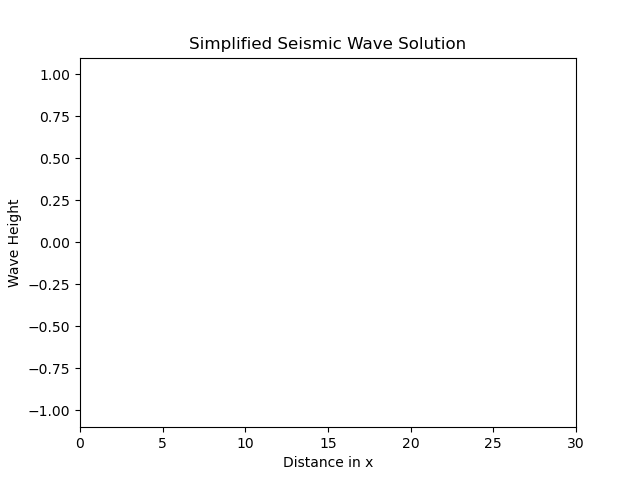

D:\Anaconda\lib\site-packages\matplotlib\animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


In [718]:
#fig2, ax = plt.subplots()

#ax.set_xlim((0, L))
#ax.set_ylim((-1.1, 1.1))
#plt.title("Simplified Seismic Wave Solution")
#plt.xlabel('Distance in x')
#plt.ylabel('Wave Height')

#line, = ax.plot([], [], lw=2)

#def init():
#    line.set_data([], [])
#    return (line,)

#def animate(i):
#    x2 = x
#    y = u[:,i]
#    line.set_data(x2, y)
#    return (line,)

#anim_Seismic = FuncAnimation(fig2, animate, init_func=init,
#                               frames=nt, interval=10, 
#                               blit=True)
anim_Seismic = plotmaking(0,L,-1.1,1.1,"Simplified Seismic Wave Solution",'Distance in x','Wave Height',x,u[:,i],nt, anim_Seismic)

# Creating the Wave Function
## Case 1 - c (or lambda) is Constant in Space

### Parameters to (re)Consider

In [719]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# Assume two layers we're dealing with are water (bottom) and air (top)
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
# Remember: default equation is partial 2nd time (t) derivative of h' + c^2 * partial 2nd space (x) derivative of h' = 0
g = 9.81 #m/(s^2) - average gravitational acceleration
H = 3700 #m - also the average depth of the ocean
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
# The following are based upon the assumption that the upper layer is air and the lower layer is water
c1 = (u_Line_Stable + ma.sqrt(g*H))/10
c2 = (u_Line_Reverse - ma.sqrt(g*H))/10
# The above values have been divided by 10 to allot for shrinking of the domain
x_Scale = 27.0 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
    # originally shortened to 2838.5 proportionally, modified to 2700 to divide evenly into t_Total
    # Represents a 10km (10000m) space scale
t_Scale = 864.0 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe at 45N (roughly 2 weeks)
    # total time divided by num of days (14) to get 86400 proportionally
    #60 #s -> 1-minute time scale
# both of the above values have been divided by 100 to reduce computational stress

### Assembling a New Grid

In [720]:
x_Total = 271
t_Total = 8641

x_Array = np.linspace(0,x_Scale,x_Total) # Evenly distanced values of x
t_Array = np.linspace(0,t_Scale,t_Total) # Evenly distanced values of t

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Stable = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Stable[i] = c1*delta_t/delta_x #Establishing the stable c/alpha case

lam_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Reverse[i] = c2*delta_t/delta_x #Establishing the above case

### Creating the two Matrices and Allocating for Space Within Them

In [721]:
stable_u = np.nan*np.ones([x_Total,t_Total])
stable_u[:,0] = np.exp(-(x_Array**2) / 2)
stable_u[:,1] = np.exp(-(x_Array**2) / 2)

reverse_u = np.nan*np.ones([x_Total,t_Total])
reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Modifying the Matrices to Make Them Tridiagonal

In [722]:
# Westerlies in mid-latitudes
stable_Data = np.array([(lam_Stable**2)*np.ones(x_Total), 2*(1-lam_Stable**2)*np.ones(x_Total), (lam_Stable**2)*np.ones(x_Total)])
stable_Diags = np.array([-1, 0, 1])
stable_M = spdiags(stable_Data, stable_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
reverse_Diags = np.array([-1, 0, 1])
reverse_M = spdiags(reverse_Data, reverse_Diags, x_Total, x_Total).toarray()

### Determining Appropriate Boundary Conditions

In [723]:
#Reflective BC
stable_M[0,0] = 2-lam_Stable[0]**2
stable_M[-1,-1] = 2-lam_Stable[-1]**2

#Reflective BC
reverse_M[0,0] = 2-lam_Reverse[0]**2
reverse_M[-1,-1] = 2-lam_Reverse[-1]**2

### Solving the Wave Equation

In [724]:
# First up, the normal case
for k in np.arange(t_Total-2):
    stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]

C:\Users\carso\AppData\Local\Temp/ipykernel_16756/1663973471.py:3: RuntimeWarning: overflow encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/1663973471.py:3: RuntimeWarning: invalid value encountered in matmul
  stable_u[:,k+2] = np.matmul(stable_M,stable_u[:,k+1]) - stable_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/1663973471.py:7: RuntimeWarning: overflow encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/1663973471.py:7: RuntimeWarning: invalid value encountered in matmul
  reverse_u[:,k+2] = np.matmul(reverse_M,reverse_u[:,k+1]) - reverse_u[:,k]


### Plotting the Two Results

In [725]:
#Normal Case is First
#for k in range(1, 2, t_Total):
#    plt.figure(4)
#    plt.title("Wave Equation Case 1: Normal Flow")
#    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
#    plt.xlabel('Distance in x');
#    plt.ylabel('Wave Height');

In [726]:
def plotmaking(x_min,x_max,y_min,y_max,title,xlabel,ylabel,x,y,tmax):
    fig, ax = plt.subplots()

    ax.set_xlim((0, x_Scale))
    ax.set_ylim((-1.1, 1.1))
    plt.title("Wave Equation Case 1: Normal Flow")
    plt.xlabel('Distance in x')
    plt.ylabel('Wave Height')

    line, = ax.plot([], [], lw=2)

    def init():
        line.set_data([], [])
        return (line,)

    def animate(i):
        x = x_Array
        y = stable_u[:,i]
        line.set_data(x, y)
        return (line,)

    anim_Case_1_Stable = FuncAnimation(fig, animate, init_func=init,
                                   frames=t_Total, interval=10, 
                                   blit=True)

<IPython.core.display.Javascript object>


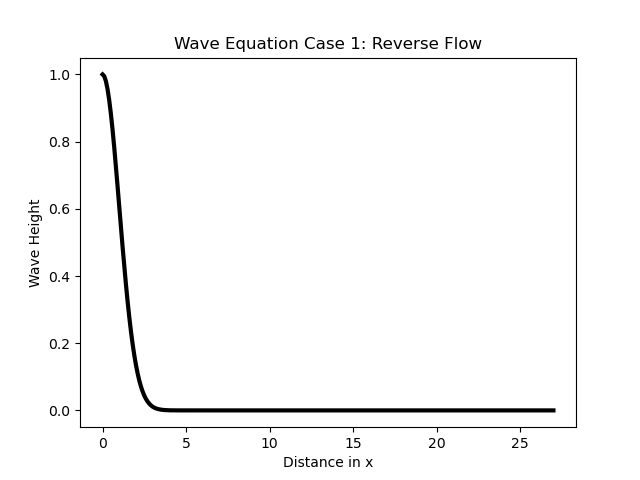

In [727]:
#Reverse Case
for k in range(1, 2, t_Total):
    plt.figure(5)
    plt.title("Wave Equation Case 1: Reverse Flow")
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('Distance in x');
    plt.ylabel('Wave Height');

# Wave Function Part II
## Case 2 - c = c(x) [lambda = lambda(x)]

### Re-evaluating Parameters

In [728]:
#H is now a function of x, which means c = c(x) and alpha = alpha(x) for both forward and reverse cases
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
g = 9.81 #m/(s^2) - average gravitational acceleration
H = np.zeros(x_Total)
for i in np.arange(x_Total):
    H[i] = 10000*np.sin(i/25) #H is now a function of x in space, which means c = c(x) and alpha = alpha(x) 
                             #for both forward and reverse cases - simulates Atlantic/Pacific crossing
    if H[i] < 0:
        H[i] = 0
#The rest of the parameters are still unchanged from Case 1 and can be recalled as is, though will be restated here
u_Line_Stable = 10 #m/s - somewhat of an average zonal wind speed value for majority of earth
u_Line_Reverse = -10 #m/s - somewhat of an average zonal wind speed value for majority of earth
x_Total = 271
t_Total = 8641
c3 = np.zeros(x_Total)
c4 = np.zeros(x_Total)
for i in np.arange(x_Total):
    c3[i] = (u_Line_Stable + ma.sqrt(g*H[i]))/10
    c4[i] = (u_Line_Reverse - ma.sqrt(g*H[i]))/10
x_Scale = 27.0 #28385000 #m - "circumference" of the Earth at 45 degrees latitude (mid-latitudes)
    # originally shortened to 2838.5 proportionally, modified to 2700 to divide evenly into t_Total
    # Represents a 10km (10000m) space scale
t_Scale = 864.0 #1209600 #s - amount of time for an individual air parcel to circumnavigate the globe at 45N (roughly 2 weeks)
    # total time divided by num of days (14) to get 86400 proportionally
    #60 #s -> 1-minute time scale
# both of the above values have been divided by 100 to reduce computational stress


### Re-establishing the Grid

<IPython.core.display.Javascript object>


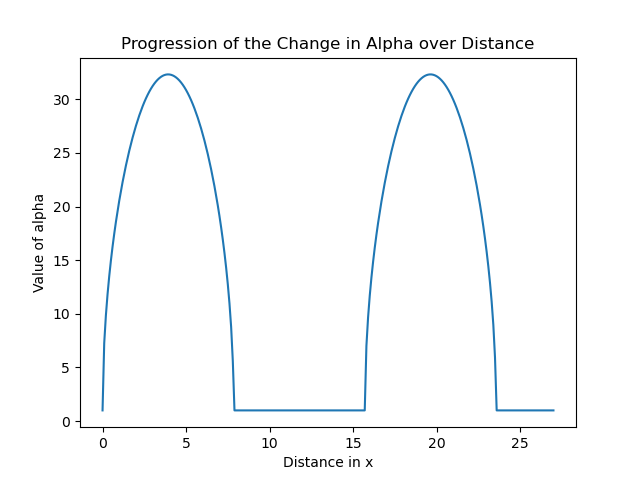

Text(0, 0.5, 'Value of alpha')

In [729]:
x_Total = 271
t_Total = 8641
    
x_Array = np.linspace(0,x_Scale,x_Total) # Evenly distanced values of x
t_Array = np.linspace(0,t_Scale,t_Total) # Evenly distanced values of t

delta_t = t_Array[1]-t_Array[0] #time step
delta_x = x_Array[1]-x_Array[0] #space step

lam_Changing = np.zeros(x_Total) #Creating the stable c/alpha case
for i in np.arange(x_Total):
    lam_Changing[i] = c3[i]*delta_t/delta_x #Establishing the stable c/alpha case

lam_Changing_Reverse = np.zeros(x_Total) #Creating the stable c/alpha case with opposite flow
for i in np.arange(x_Total):
    lam_Changing_Reverse[i] = c4[i]*delta_t/delta_x #Establishing the above case
    
plt.figure(6)
plt.title("Progression of the Change in Alpha over Distance")
plt.plot(x_Array,lam_Changing)
plt.xlabel('Distance in x')
plt.ylabel('Value of alpha')

### Creating Two Matrices with Changing Wave Phase Speed

In [730]:
changing_u = np.nan*np.ones([x_Total,t_Total])
changing_u[:,0] = np.exp(-(x_Array**2) / 2)
changing_u[:,1] = np.exp(-(x_Array**2) / 2)

changing_reverse_u = np.nan*np.ones([x_Total,t_Total])
changing_reverse_u[:,0] = np.exp(-(x_Array**2) / 2)
changing_reverse_u[:,1] = np.exp(-(x_Array**2) / 2)

### Turning the Default Matrices into Tridiagonal Matrices

In [731]:
# Westerlies in mid-latitudes
changing_Data = np.array([(lam_Changing**2)*np.ones(x_Total), 2*(1-lam_Changing**2)*np.ones(x_Total), (lam_Changing**2)*np.ones(x_Total)])
changing_Diags = np.array([-1, 0, 1])
changing_M = spdiags(changing_Data, changing_Diags, x_Total, x_Total).toarray()

# Now for the Other Option (aka westerlies are now easterlies)
changing_reverse_Data = np.array([(lam_Reverse**2)*np.ones(x_Total), 2*(1-lam_Reverse**2)*np.ones(x_Total), (lam_Reverse**2)*np.ones(x_Total)])
changing_reverse_Diags = np.array([-1, 0, 1])
changing_reverse_M = spdiags(changing_reverse_Data, changing_reverse_Diags, x_Total, x_Total).toarray()

### Boundary Conditions

In [732]:
#Reflective BC
changing_M[0,0] = 2-lam_Changing[0]**2
changing_M[-1,-1] = 2-lam_Changing[-1]**2

#Reflective BC
changing_reverse_M[0,0] = 2-lam_Changing[0]**2
changing_reverse_M[-1,-1] = 2-lam_Changing[-1]**2

### Solving the Wave Equation when c is a function of x

In [733]:
# First up, the normal case
for k in np.arange(t_Total-2):
    changing_u[:,k+2] = np.matmul(changing_M,changing_u[:,k+1]) - changing_u[:,k]
    
# And now the reverse!
for k in np.arange(t_Total-2):
    changing_reverse_u[:,k+2] = np.matmul(changing_reverse_M,changing_reverse_u[:,k+1]) - changing_reverse_u[:,k]

C:\Users\carso\AppData\Local\Temp/ipykernel_16756/3013458842.py:3: RuntimeWarning: overflow encountered in matmul
  changing_u[:,k+2] = np.matmul(changing_M,changing_u[:,k+1]) - changing_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/3013458842.py:3: RuntimeWarning: invalid value encountered in matmul
  changing_u[:,k+2] = np.matmul(changing_M,changing_u[:,k+1]) - changing_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/3013458842.py:7: RuntimeWarning: overflow encountered in matmul
  changing_reverse_u[:,k+2] = np.matmul(changing_reverse_M,changing_reverse_u[:,k+1]) - changing_reverse_u[:,k]
C:\Users\carso\AppData\Local\Temp/ipykernel_16756/3013458842.py:7: RuntimeWarning: invalid value encountered in matmul
  changing_reverse_u[:,k+2] = np.matmul(changing_reverse_M,changing_reverse_u[:,k+1]) - changing_reverse_u[:,k]


### Plotting our Results

<IPython.core.display.Javascript object>


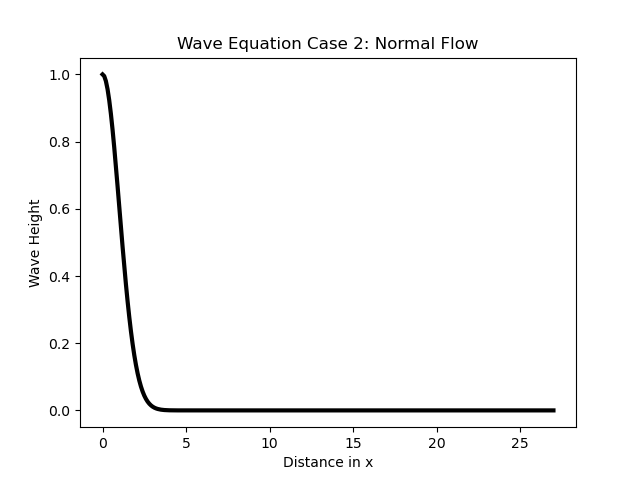

In [734]:
#Normal Case is First
for k in range(1, 2, t_Total):
    plt.figure(7)
    plt.title("Wave Equation Case 2: Normal Flow")
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('Distance in x');
    plt.ylabel('Wave Height');

<IPython.core.display.Javascript object>


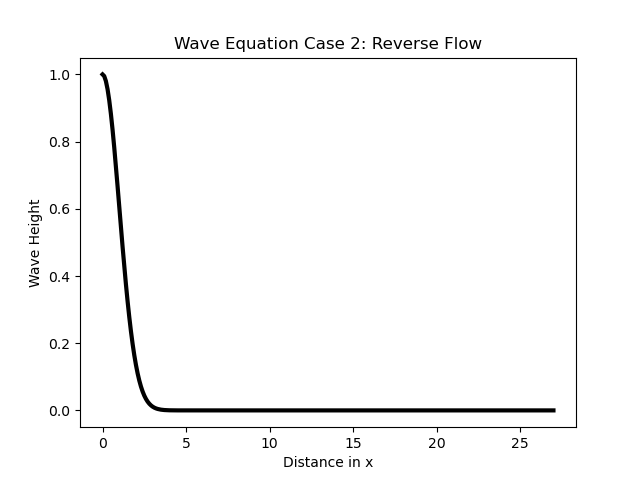

In [735]:
#Reverse Case
for k in range(1, 2, t_Total):
    plt.figure(8)
    plt.title("Wave Equation Case 2: Reverse Flow")
    plt.plot(x_Array,stable_u[:,k],'k',linewidth=3)
    plt.xlabel('Distance in x');
    plt.ylabel('Wave Height');